https://medium.com/datadriveninvestor/a-simple-guide-to-creating-predictive-models-in-python-part-1-8e3ddc3d7008

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
df = pd.read_csv("data.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [2]:
# removing the irrelevant columns
cols_to_drop = ["RowNumber","CustomerId","Surname"]
df = df.drop(columns=cols_to_drop,axis=1)
# first five rows of dataframe after removing columns
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


<AxesSubplot:xlabel='Age'>

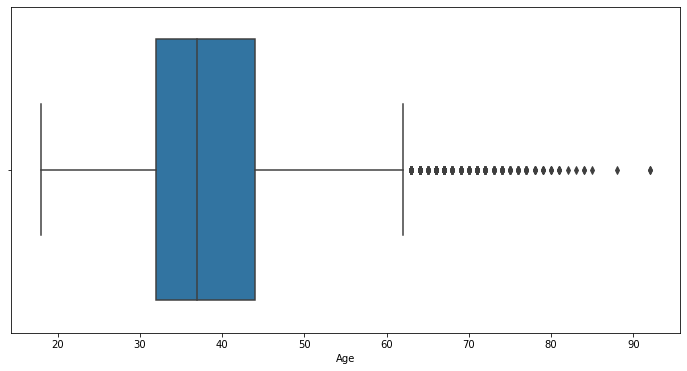

In [3]:
import seaborn as sns
plt.figure(figsize=(12,6))
sns.boxplot(df.Age)

In [4]:
deep_df = df.copy(deep = True)

In [5]:
deep_df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [6]:
numerical_columns = [col for col in df.columns if (df[col].dtype=='int64' or df[col].dtype=='float64') and col != 'Exited']
# n_co=df.select_dtypes(include=[np.number])
# del n_co.Exited
# n_co
# .drop(['Exited'])
# type(n_co)
# del n_co['Exited']

In [7]:
df[numerical_columns].describe().loc[['min','max', 'mean','50%'],:]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
min,350.0000,18.0000,0.0000,0.000000,1.0000,0.0000,0.0000,11.580000
max,850.0000,92.0000,10.0000,250898.090000,4.0000,1.0000,1.0000,199992.480000
mean,650.5288,38.9218,5.0128,76485.889288,1.5302,0.7055,0.5151,100090.239881
50%,652.0000,37.0000,5.0000,97198.540000,1.0000,1.0000,1.0000,100193.915000


In [8]:
percentages = []
for gen in list(df["Gender"].unique()):
    
    p = round((df["Exited"][df["Gender"]==gen].value_counts()[1]/df["Exited"][df["Gender"]==gen].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(gen,"(% to exit) : ", p)

Female (% to exit) :  25.07
Male (% to exit) :  16.46


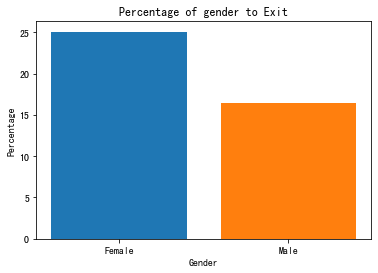

In [9]:
plt.bar(0, percentages[0])
plt.bar(1, percentages[1])
plt.xticks((0,1), ('Female','Male'))
plt.xlabel("Gender")
plt.ylabel("Percentage")
plt.title("Percentage of gender to Exit")
plt.show()

In [10]:
percentages = []
for country in list(df["Geography"].unique()):
    
    p = round((df["Exited"][df["Geography"]==country].value_counts()[1]/df["Exited"][df["Geography"]==country].value_counts().sum())*100 , 2)
    
    percentages.append(p)
    print(country,"(% to exit) : ", p)

France (% to exit) :  16.15
Spain (% to exit) :  16.67
Germany (% to exit) :  32.44


In [11]:
df["Exited"][df["Geography"]=='France'].value_counts().sum()

5014

Text(0, 0.5, 'Frequency')

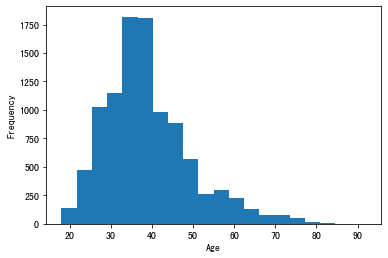

In [12]:
plt.hist(df["Age"],bins=20)
plt.xlabel("Age")
plt.ylabel("Frequency")

In [13]:
df["Age"] = pd.cut(df["Age"],bins=[10,20,30,40,50,60,70,80,90,100])
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,"(40, 50]",2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,"(40, 50]",1,83807.86,1,0,1,112542.58,0
2,502,France,Female,"(40, 50]",8,159660.80,3,1,0,113931.57,1
3,699,France,Female,"(30, 40]",1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,"(40, 50]",2,125510.82,1,1,1,79084.10,0


In [14]:
df = pd.get_dummies(df)
df

,CreditScore,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,...,Gender_Male,"Age_(10, 20]","Age_(20, 30]","Age_(30, 40]","Age_(40, 50]","Age_(50, 60]","Age_(60, 70]","Age_(70, 80]","Age_(80, 90]","Age_(90, 100]"
0,619,2,0.00,1,1,1,101348.88,1,1,0,...,0,0,0,0,1,0,0,0,0,0
1,608,1,83807.86,1,0,1,112542.58,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,502,8,159660.80,3,1,0,113931.57,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,699,1,0.00,2,0,0,93826.63,0,1,0,...,0,0,0,1,0,0,0,0,0,0
4,850,2,125510.82,1,1,1,79084.10,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,5,0.00,2,1,0,96270.64,0,1,0,...,1,0,0,1,0,0,0,0,0,0
9996,516,10,57369.61,1,1,1,101699.77,0,1,0,...,1,0,0,1,0,0,0,0,0,0
9997,709,7,0.00,1,0,1,42085.58,1,1,0,...,0,0,0,1,0,0,0,0,0,0
9998,772,3,75075.31,2,1,0,92888.52,1,0,1,...,1,0,0,0,1,0,0,0,0,0


In [15]:
df = df.drop(columns=["Geography_France","Gender_Female"],axis=1)

In [16]:
df = df.iloc[:,:-1]

In [17]:
df.to_csv('Clean_data.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Tenure             10000 non-null  int64  
 2   Balance            10000 non-null  float64
 3   NumOfProducts      10000 non-null  int64  
 4   HasCrCard          10000 non-null  int64  
 5   IsActiveMember     10000 non-null  int64  
 6   EstimatedSalary    10000 non-null  float64
 7   Exited             10000 non-null  int64  
 8   Geography_Germany  10000 non-null  uint8  
 9   Geography_Spain    10000 non-null  uint8  
 10  Gender_Male        10000 non-null  uint8  
 11  Age_(10, 20]       10000 non-null  uint8  
 12  Age_(20, 30]       10000 non-null  uint8  
 13  Age_(30, 40]       10000 non-null  uint8  
 14  Age_(40, 50]       10000 non-null  uint8  
 15  Age_(50, 60]       10000 non-null  uint8  
 16  Age_(60, 70]       1000

In [19]:
feat = df.drop(columns=['Exited'],axis=1)
label = df["Exited"]

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(feat, label, test_size=0.3)

In [23]:
X_train.shape

(7000, 18)

In [26]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc_x = StandardScaler()
X_train = sc_x.fit_transform(X_train)
X_test = sc_x.fit_transform(X_test)

In [30]:
X_train[1] 

array([-0.99433875,  0.34367383,  0.25405479, -0.91505149,  0.6430943 ,
       -1.02107926,  0.44614277, -0.58262901, -0.56657212, -1.09570336,
       -0.09605842, -0.48926145, -0.88127734,  1.81217155, -0.29488391,
       -0.18679025, -0.10954187, -0.03587993])

In [31]:
from sklearn.svm import SVC
support_vector_classifier = SVC(kernel='rbf')
support_vector_classifier.fit(X_train,y_train)
y_pred_svc = support_vector_classifier.predict(X_test)

In [32]:
from sklearn.metrics import confusion_matrix
cm_support_vector_classifier = confusion_matrix(y_test,y_pred_svc)
print(cm_support_vector_classifier,end='\n\n')

[[2287   74]
 [ 410  229]]



In [33]:
numerator = cm_support_vector_classifier[0][0] + cm_support_vector_classifier[1][1]
denominator = sum(cm_support_vector_classifier[0]) + sum(cm_support_vector_classifier[1])
acc_svc = (numerator/denominator) * 100
print("Accuracy : ",round(acc_svc,2),"%")

Accuracy :  83.87 %
